In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
def read_and_clean(filename):
    '''
    Function takes input as filename to be cleaned. Rows that have values of nan are deleted. 
    Remaining rows are returned as an ndarray.
    '''
    data = np.genfromtxt(fname)
    data = np.delete(data, np.where(np.isnan(data))[0], axis=0)
    
    return data

<i>Using the convolve function was not an original idea - I would like to thank Stackoverflow for this.</i>

In [3]:
def smooth_data(data, width):
    '''
    This function takes the rolling/moving average of the fluxes - second column of the 'data' array
    This is done by using the numpy.convolve method. 
    '''
    return np.convolve(data[:,1], np.ones(width), 'valid')/width # This returns along with the 'side' 
                                                                 # values for now - these are to be exluded later
    

In [4]:
def plot_light_curve(data):
    plt.plot(data[:,0], data[:,1], ',')


In [26]:
def find_freq(data, max_freq = 2000, n_bins = 100):
    freq_range = np.linspace(.2, max_freq, n_bins)
    power = sc.signal.lombscargle(data[:,0], data[:,1], freq_range, normalize = True)
    # plt.plot(freq_range, power)
    T_peak = 1/freq_range[np.argmax(power)] # Identifying peak of power function and returning corresponding time period

    fig_fft, ax3 = plt.subplots(1, 1, figsize=(12,5), facecolor='aliceblue')
    ax3.plot(freq_range, power)
    return T_peak, power

<i>The above function seems to produce varying results for different values of n_bins, which should not be happening.</i>

Time period = 2.875722543352601 days


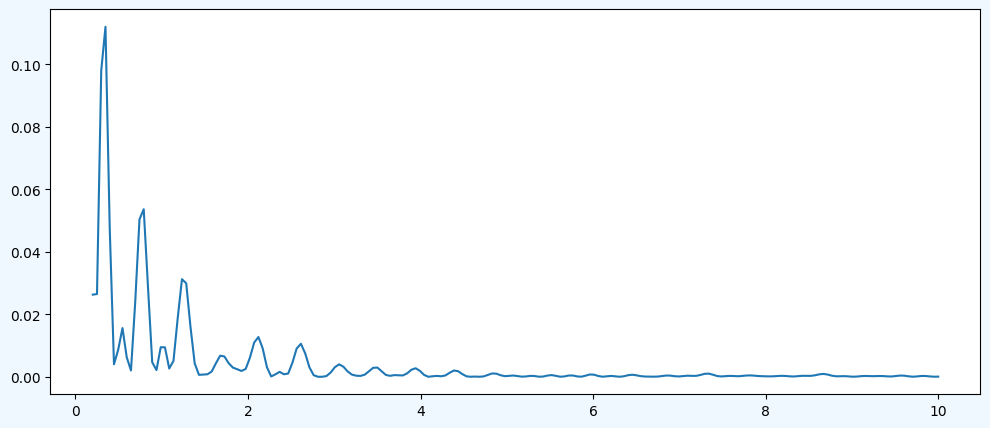

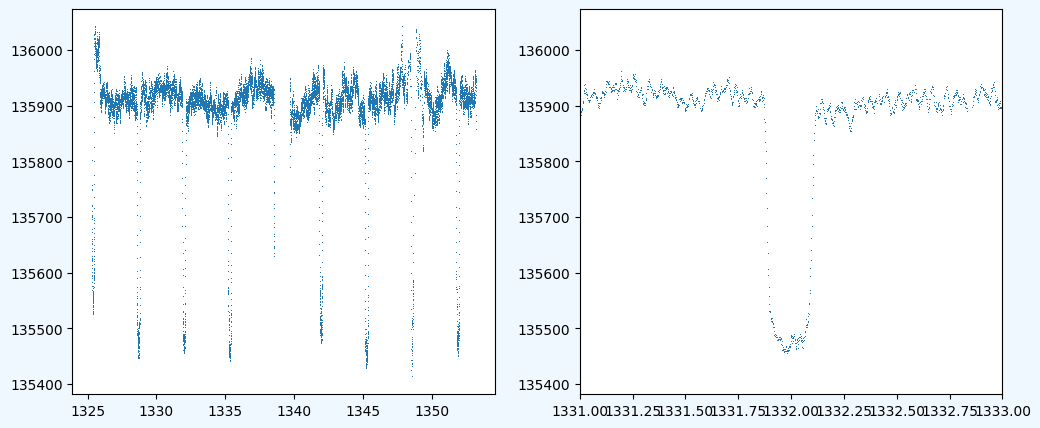

In [27]:
fname = 'Data/tess_lc1.dat'
window_length = 13  # has to be odd as you need to take the same number of values on either side of the cell
dat = read_and_clean(fname)

dat[:,1][int((window_length-1)/2):-int((window_length-1)/2)] = smooth_data(dat,window_length)
# plt.plot(dat[:,0], dat[:,1], ',')
# plt.show()
print(f'Time period = {find_freq(dat, 10, 200)[0]} days')
# plt.xlim(1331, 1333)

fig_timeseries, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), facecolor='aliceblue')
ax1.plot(dat[:,0], dat[:,1], ',')
ax2.plot(dat[:,0], dat[:,1], ',')
ax2.set_xlim(1331, 1333)
plt.show()
